In [392]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.metrics import r2_score,mean_squared_error
warnings.filterwarnings("ignore")

In [341]:
# importing the data
df=pd.read_csv("Avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [342]:
df.shape # checking the numbers of rows and columns

(1517, 14)

In [343]:
df.columns 

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [344]:
#checking the datatypes
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [346]:
df.isnull().sum() # checking null values in the data.

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values are present

In [347]:
# droping unnamed columns
df.drop("Unnamed: 0",axis=1,inplace=True)

In [348]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [349]:
df.shape

(1517, 13)

<AxesSubplot:>

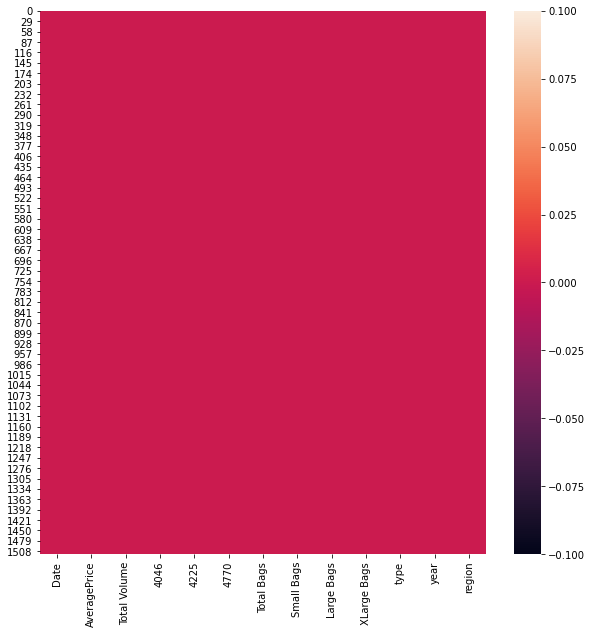

In [350]:
# cheaking null values with visualization 
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [396]:
df.describe()#checking mean meadian anda standard devation in datasset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,13.019328,11.216036,11.871686,8.557664,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440,6.362558,15.253790
std,0.188891,1.436970,2.337126,1.703644,2.575991,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398,3.472146,8.965902
min,0.490000,10.564931,6.150006,7.487045,0.000000,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,0.980000,11.901387,9.923356,10.632896,6.815914,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000,3.000000,7.000000
50%,1.080000,12.906178,11.311448,11.684067,8.947568,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000,6.000000,15.000000
75%,1.190000,13.797322,12.841536,13.092216,10.280838,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000,9.000000,22.000000
max,1.680000,17.614487,16.756419,16.757656,14.138693,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000,12.000000,31.000000


In [397]:
# spliting date in day month and year 
df["Date"]=pd.to_datetime(df["Date"])
df["Date"]

0      2015-12-27
1      2015-12-20
2      2015-12-13
3      2015-06-12
4      2015-11-29
          ...    
1512   2016-10-16
1513   2016-09-10
1514   2016-02-10
1515   2016-09-25
1516   2016-09-18
Name: Date, Length: 1517, dtype: datetime64[ns]

In [398]:
df["Date"].dt.month

0       12
1       12
2       12
3        6
4       11
        ..
1512    10
1513     9
1514     2
1515     9
1516     9
Name: Date, Length: 1517, dtype: int64

In [399]:
df["Date"].dt.day

0       27
1       20
2       13
3       12
4       29
        ..
1512    16
1513    10
1514    10
1515    25
1516    18
Name: Date, Length: 1517, dtype: int64

In [400]:
#we sperated the date by day month and year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [401]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,8696.87,8603.62,93.25,0.00,2015,0,12,27
1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9505.56,9408.07,97.49,0.00,2015,0,12,20
2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,8145.35,8042.21,103.14,0.00,2015,0,12,13
3,2015-06-12,1.08,11.277116,7.032624,11.184108,4.298373,5811.16,5677.40,133.76,0.00,2015,0,6,12
4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,6183.95,5986.26,197.69,0.00,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,12.159227,10.960064,10.939651,9.771828,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,2016-09-10,1.51,12.090868,10.676528,10.862658,9.874088,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,2016-02-10,1.48,12.091850,10.744316,10.876052,9.725432,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,2016-09-25,1.47,12.150203,10.898807,10.889203,9.769752,63931.73,55653.47,8278.26,0.00,2016,7,9,25


In [402]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,8696.87,8603.62,93.25,0.00,2015,0,12,27
1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9505.56,9408.07,97.49,0.00,2015,0,12,20
2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,8145.35,8042.21,103.14,0.00,2015,0,12,13
3,2015-06-12,1.08,11.277116,7.032624,11.184108,4.298373,5811.16,5677.40,133.76,0.00,2015,0,6,12
4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,6183.95,5986.26,197.69,0.00,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,12.159227,10.960064,10.939651,9.771828,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,2016-09-10,1.51,12.090868,10.676528,10.862658,9.874088,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,2016-02-10,1.48,12.091850,10.744316,10.876052,9.725432,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,2016-09-25,1.47,12.150203,10.898807,10.889203,9.769752,63931.73,55653.47,8278.26,0.00,2016,7,9,25


In [403]:
df.shape

(1517, 14)

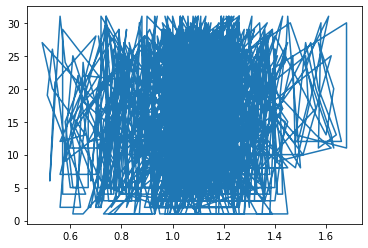

In [405]:
#Analysis of average price according to the day
x=df["AveragePrice"]
y=df["Day"]
plt.plot(x,y)
xlabel='Day'
ylabel='Average Price'
plt.show()

<AxesSubplot:xlabel='Date'>

<Figure size 1080x1080 with 0 Axes>

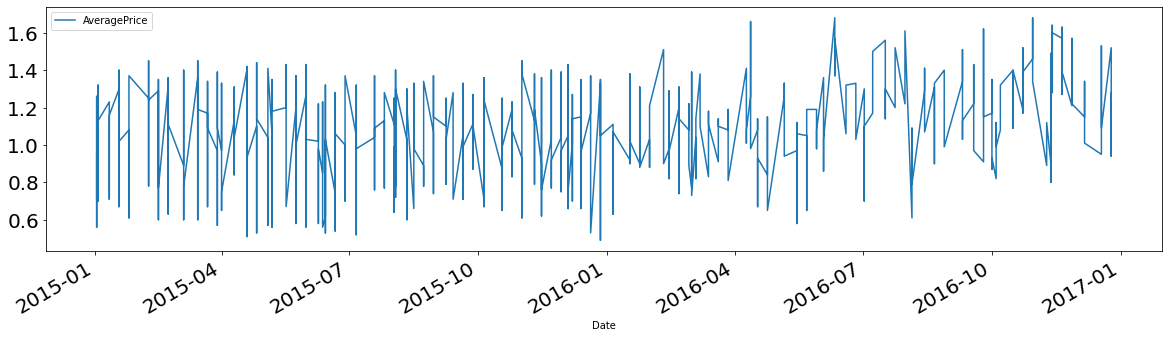

In [406]:
plt.figure(figsize=(15,15))
df.plot(x='Date', y='AveragePrice', kind="line", fontsize=20, figsize=(20,5))

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  year          1517 non-null   int64         
 11  region        1517 non-null   int32         
 12  Month         1517 non-null   int64         
 13  Day           1517 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(3)
memory usage: 160.1 KB


<AxesSubplot:xlabel='year'>

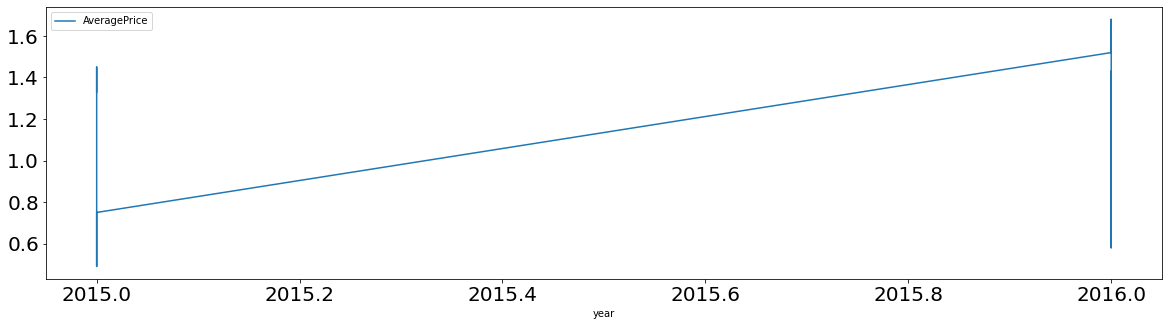

In [408]:
df.plot(x='year', y='AveragePrice', kind="line", fontsize=20, figsize=(20,5))

In [409]:
# to find average price
df["AveragePrice"].mean()

1.0749901120632825

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

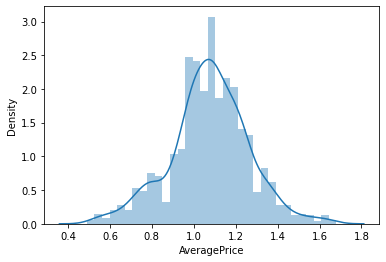

In [411]:
sns.distplot(df["AveragePrice"])# finding the average by visualization

In [365]:
#sns.distplot?

In [366]:
df["type"].unique()

array(['conventional'], dtype=object)

In [367]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [368]:
from sklearn.preprocessing import LabelEncoder

In [369]:
le=LabelEncoder()

In [370]:
df["type"]=le.fit_transform(df["type"])
df["region"]=le.fit_transform(df["region"])

In [371]:
print(df["type"])
print(df["region"])

0       0
1       0
2       0
3       0
4       0
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: type, Length: 1517, dtype: int32
0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32


AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
year            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
region             AxesSubplot(0.125,0.437414;0.133621x0.130172)
Month           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Day              AxesSubplot(0.44569,0.437414;0.133621x0.130172)
dtype: object

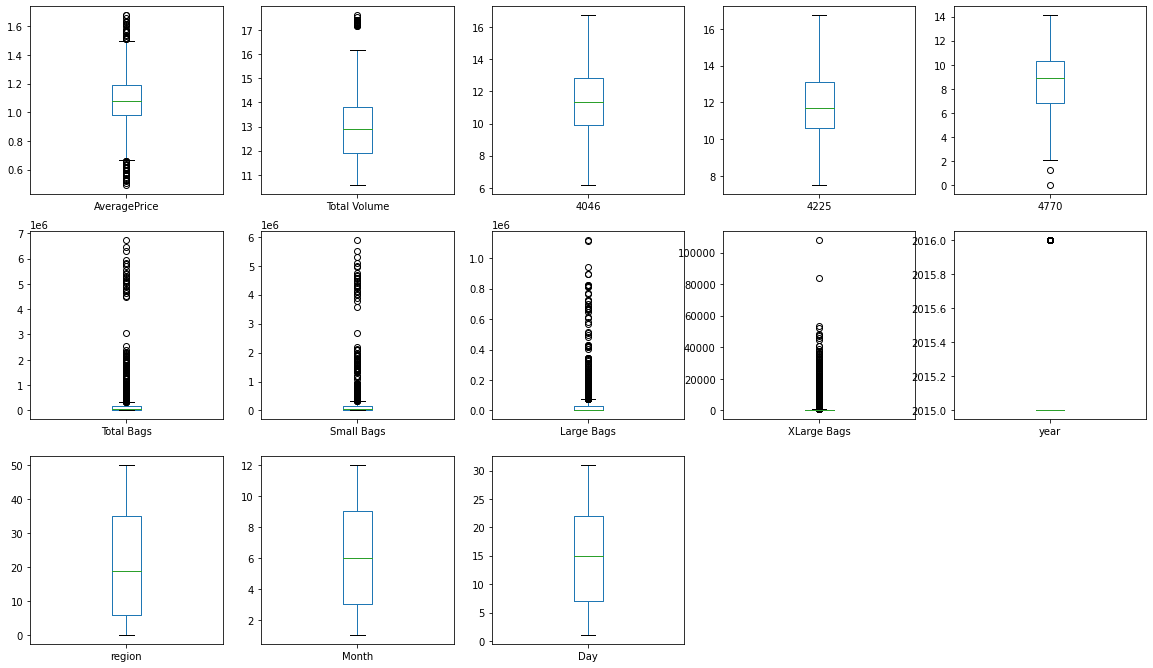

In [412]:
#ploting box plot
df.plot( kind="box",subplots=True, layout=(5,5) ,fontsize=10, figsize=(20,20))

In [413]:
df.skew() #to see the skweness

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [414]:
df.corr()# finding the skweness

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
AveragePrice,1.000000,-0.326692,-0.511040,-0.129466,-0.289056,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408,0.060642,0.092589
Total Volume,-0.326692,1.000000,0.767171,0.890715,0.639882,0.667869,0.662333,0.626486,0.445799,0.003417,0.198022,-0.070180,-0.048850
4046,-0.511040,0.767171,1.000000,0.456283,0.584634,0.496936,0.487648,0.493331,0.349479,-0.124610,0.324688,-0.067074,-0.037744
4225,-0.129466,0.890715,0.456283,1.000000,0.552522,0.591908,0.590316,0.537757,0.384344,0.005161,0.134603,-0.043650,-0.047734
4770,-0.289056,0.639882,0.584634,0.552522,1.000000,0.460649,0.462954,0.392035,0.411108,0.004865,0.052908,-0.020798,0.001779
Total Bags,-0.111597,0.667869,0.496936,0.591908,0.460649,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001,-0.047747,-0.021137
Small Bags,-0.097682,0.662333,0.487648,0.590316,0.462954,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650,-0.048978,-0.016462
Large Bags,-0.177480,0.626486,0.493331,0.537757,0.392035,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452,-0.039242,-0.046578
XLarge Bags,-0.048284,0.445799,0.349479,0.384344,0.411108,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144,0.021452,0.019315
year,0.178683,0.003417,-0.124610,0.005161,0.004865,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472,-0.013144,0.029744


<AxesSubplot:>

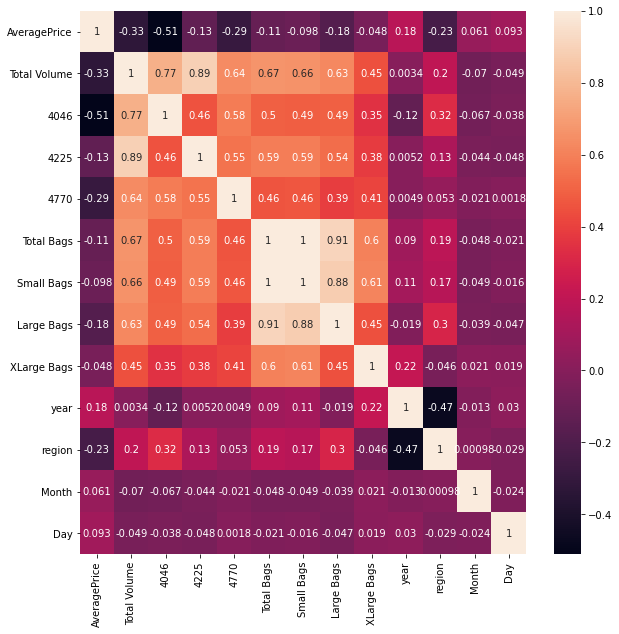

In [415]:
# heatmap with correlation values 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [416]:
skew=('Total Volume','4046','4225','4770')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [417]:
df.drop("type",axis=1,inplace=True)

KeyError: "['type'] not found in axis"

In [ ]:
x=df.drop(["AveragePrice","Date","Month","Day"],axis=1)
x.head()

In [418]:
y=df["AveragePrice"]
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [386]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [387]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=63)

In [388]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [390]:
lr=LinearRegression()
las=Lasso()
Ri=Ridge()
el=ElasticNet()
dtr=DecisionTreeRegressor()
kn=KNeighborsRegressor()
abr=AdaBoostRegressor(random_state=63)
rfr=RandomForestRegressor(random_state=63)
gbr=GradientBoostingRegressor(random_state=63)

In [391]:
models=[]
models.append(('LinearRegression',lr))
models.append(('Lasso',las))
models.append(('Ridge',Ri))
models.append(('ElasticNet',el))
models.append(('DecisionTreeRegressor',dtr))
models.append(('KNeighborsRegressor',kn))

In [394]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print(name)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

LinearRegression
R2_score =  0.31857066964459146
Mean_Squared_Error = 0.023716970289151887
Cross_Val_Score =  -0.040154820208968454


Lasso
R2_score =  -2.2896005778427764e-05
Mean_Squared_Error = 0.034805536328573486
Cross_Val_Score =  -0.2292630304929663


Ridge
R2_score =  0.3187653778616273
Mean_Squared_Error = 0.02371019352039131
Cross_Val_Score =  -0.037741943789965315


ElasticNet
R2_score =  -2.2896005778427764e-05
Mean_Squared_Error = 0.034805536328573486
Cross_Val_Score =  -0.2292630304929663


DecisionTreeRegressor
R2_score =  0.7244306788204425
Mean_Squared_Error = 0.009591118421052633
Cross_Val_Score =  -1.148600180658566


KNeighborsRegressor
R2_score =  0.8197137547758214
Mean_Squared_Error = 0.006274815789473681
Cross_Val_Score =  -0.39214157753067347




In [419]:
from sklearn import externals
import joblib
joblib.dump(kn,'avacado.pkl')

['avacado.pkl']